<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/NaiveBayes_Spam_Classifier/blob/master/NaiveBayes_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NaiveBayes Spam Classifier**

## **Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import math
from collections import defaultdict

## **Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv('spam_ham_dataset.csv')

## **Preprocessing Function**

In [3]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return words

## **Apply Preprocessing**

In [4]:
# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

## **Split Train / Test**

In [5]:
# Split dataset manually (80% train - 20% test)
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

## **Initialize Data Structures**

In [6]:
# Initialize data structures
vocab = set()
word_counts_spam = defaultdict(int)
word_counts_ham = defaultdict(int)
spam_docs = 0
ham_docs = 0
total_words_spam = 0
total_words_ham = 0

## **Build Vocabulary and count Word Frequencies**

In [7]:
# Build vocabulary and count word frequencies
for index, row in train_df.iterrows():
    label = row['label']
    words = row['clean_text']
    if label == 'spam':
        spam_docs += 1
        for word in words:
            vocab.add(word)
            word_counts_spam[word] += 1
            total_words_spam += 1
    else:
        ham_docs += 1
        for word in words:
            vocab.add(word)
            word_counts_ham[word] += 1
            total_words_ham += 1

## **Compute Prior Probabilities**

In [8]:
# Compute prior probabilities
P_spam = spam_docs / len(train_df)
P_ham = ham_docs / len(train_df)

## **Compute Conditional Probabilities with Laplace Smoothing**

In [9]:
# Compute conditional probabilities with Laplace smoothing
def word_prob(word, label):
    if label == 'spam':
        return (word_counts_spam[word] + 1) / (total_words_spam + len(vocab))
    else:
        return (word_counts_ham[word] + 1) / (total_words_ham + len(vocab))

## **Naive Bayes Classifier**

In [10]:
# Naive Bayes classifier
def predict(email_words):
    # Initialize log probabilities
    log_prob_spam = math.log(P_spam)
    log_prob_ham = math.log(P_ham)

    for word in email_words:
        if word in vocab:
            log_prob_spam += math.log(word_prob(word, 'spam'))
            log_prob_ham += math.log(word_prob(word, 'ham'))
    # Compare log probabilities
    if log_prob_spam > log_prob_ham:
        return 1  # spam
    else:
        return 0  # ham

## **Test the Model**

In [11]:
# Test the model
y_true = []
y_pred = []

for index, row in test_df.iterrows():
    label_num = row['label_num']
    words = row['clean_text']
    prediction = predict(words)

    y_true.append(label_num)
    y_pred.append(prediction)

## **Evaluate Accuracy**

In [12]:
# Evaluate accuracy
correct = sum([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))])
accuracy = correct / len(y_true)

print(f"Accuracy (from scratch Naive Bayes): {accuracy * 100:.2f}%")

Accuracy (from scratch Naive Bayes): 98.26%


## **Build Confusion Matrix Manually**

In [13]:
# Build Confusion Matrix manually
TP = sum(1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1)
TN = sum(1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0)
FP = sum(1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1)
FN = sum(1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0)

print("Confusion Matrix:")
print(f"TP: {TP}   FP: {FP}")
print(f"FN: {FN}   TN: {TN}")

Confusion Matrix:
TP: 308   FP: 6
FN: 12   TN: 709


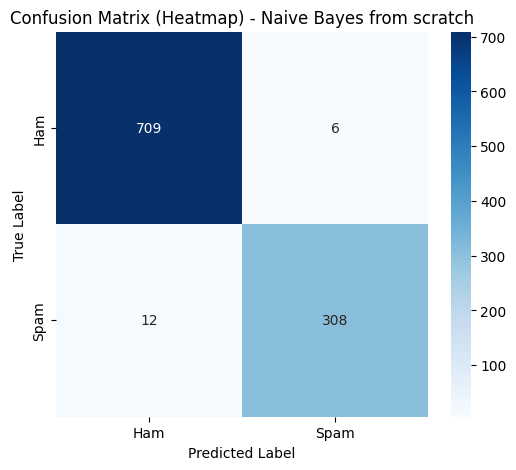

In [14]:
# Manually build confusion matrix as numpy array
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Heatmap) - Naive Bayes from scratch')
plt.show()

## **Save Predictions to CSV**

In [15]:
# Save predictions to CSV
# Requirement: one column named "Spam", values are y_pred

predictions_df = pd.DataFrame({'Spam': y_pred})
predictions_df.to_csv('spam_predictions_from_scratch.csv', index=False)

print("Predictions saved to 'spam_predictions_from_scratch.csv'")

Predictions saved to 'spam_predictions_from_scratch.csv'


## **THE END**